Whole 3D volume - steva

In [1]:
import os
import nibabel as nib
import numpy as np
from skimage.metrics import structural_similarity as ssim

# === Configuration ===
subjects = ["sub-001", "sub-002", "sub-003"]
positions = ["up", "down", "left", "right"]
comparisons = {
    "50p": ("stevafull", "steva50p"),
    "75p": ("stevafull", "steva75p"),
    "95p": ("stevafull", "steva95p"),
    "woBin": ("stevafull", "stevaFull")  # note the slightly different naming convention
}

base_dir = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions"

# === Helper function to load and normalize MRI volumes ===
def load_nifti_as_array(path):
    img = nib.load(path)
    data = img.get_fdata()
    # Normalize intensity to [0,1] for fair comparison
    data = (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-8)
    return data

# === Compute SSIM between two 3D volumes ===
def compute_volume_ssim(vol1, vol2):
    # The skimage SSIM supports multi-dimensional data (e.g. 3D)
    ssim_val = ssim(vol1, vol2, data_range=1.0)
    return ssim_val

# === Main loop ===
results = []

for sub in subjects:
    for pos in positions:
        for label, (ref_tag, test_tag) in comparisons.items():
            if label == "woBin":
                # Slightly different filename pattern for woBin
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{test_tag}_T1w.nii.gz")
            else:
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{test_tag}_T1w.nii.gz")
            
            # Check both files exist
            if not (os.path.exists(ref_path) and os.path.exists(test_path)):
                print(f"⚠️ Skipping missing files for {sub} {pos} {label}")
                continue

            # Load volumes
            ref_vol = load_nifti_as_array(ref_path)
            test_vol = load_nifti_as_array(test_path)

            # Compute SSIM
            ssim_val = compute_volume_ssim(ref_vol, test_vol)
            results.append((sub, pos, label, ssim_val))
            print(f"✅ {sub} | {pos} | {label}: SSIM = {ssim_val:.4f}")

# === Save results to CSV ===
import csv
out_csv = "ssim_volume.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["subject", "position", "comparison", "ssim"])
    writer.writerows(results)

print(f"\n📁 SSIM results saved to: {out_csv}")

✅ sub-001 | up | 50p: SSIM = 0.9668
✅ sub-001 | up | 75p: SSIM = 0.9464
✅ sub-001 | up | 95p: SSIM = 0.8652
✅ sub-001 | up | woBin: SSIM = 0.9586
✅ sub-001 | down | 50p: SSIM = 0.9692
✅ sub-001 | down | 75p: SSIM = 0.9515
✅ sub-001 | down | 95p: SSIM = 0.8609
✅ sub-001 | down | woBin: SSIM = 0.9659
✅ sub-001 | left | 50p: SSIM = 0.9682
✅ sub-001 | left | 75p: SSIM = 0.9458
✅ sub-001 | left | 95p: SSIM = 0.8751
✅ sub-001 | left | woBin: SSIM = 0.9685
✅ sub-001 | right | 50p: SSIM = 0.9650
✅ sub-001 | right | 75p: SSIM = 0.9433
✅ sub-001 | right | 95p: SSIM = 0.8391
✅ sub-001 | right | woBin: SSIM = 0.9589
✅ sub-002 | up | 50p: SSIM = 0.9754
✅ sub-002 | up | 75p: SSIM = 0.9392
✅ sub-002 | up | 95p: SSIM = 0.8274
✅ sub-002 | up | woBin: SSIM = 0.9735
✅ sub-002 | down | 50p: SSIM = 0.9540
✅ sub-002 | down | 75p: SSIM = 0.9174
✅ sub-002 | down | 95p: SSIM = 0.7746
✅ sub-002 | down | woBin: SSIM = 0.9707
✅ sub-002 | left | 50p: SSIM = 0.9732
✅ sub-002 | left | 75p: SSIM = 0.9432
✅ sub-002 | 

Line plot steva

In [19]:
import pandas as pd
import plotly.express as px

df_res = pd.read_csv('/home/debi/jaime/repos/MR-EyeTrack/analysis/comparison/ssim/ssim_volume.csv')

# average across positions for each subject and comparison
df_mean = df_res.groupby(["subject", "comparison"], as_index=False)["ssim"].mean()

# ensure ordering of undersampling levels
labels = ["woBin", "50p", "75p", "95p"]
df_mean["comparison"] = pd.Categorical(df_mean["comparison"], categories=labels, ordered=True)
df_mean.sort_values(["comparison", "subject"], inplace=True)

# line plot: one line per subject, values averaged across positions
fig = px.line(
    df_mean,
    x="comparison",
    y="ssim",
    color="subject",
    markers=True,
    category_orders={"comparison": labels},
    title="Steva — Mean SSIM per Subject (averaged across positions)",
    labels={"comparison": "Undersampling Level", "ssim": "Mean SSIM"}
)
fig.update_layout(yaxis=dict(range=[0, 1]), legend_title_text="Subject")
fig.show()


Whole 3D volume - mathilda

In [ ]:
import os
import nibabel as nib
import numpy as np
from skimage.metrics import structural_similarity as ssim

# === Configuration ===
subjects = ["sub-001", "sub-002", "sub-003"]
positions = ["up", "down", "left", "right"]
comparisons = {
    "50p": ("mathildafull", "mathilda50p"),
    "75p": ("mathildafull", "mathilda75p"),
    "95p": ("mathildafull", "mathilda95p"),
    "woBin": ("mathildafull", "mathildaFull")  # note the slightly different naming convention
}

base_dir = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions"

# === Helper function to load and normalize MRI volumes ===
def load_nifti_as_array(path):
    img = nib.load(path)
    data = img.get_fdata()
    # Normalize intensity to [0,1] for fair comparison
    data = (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-8)
    return data

# === Compute SSIM between two 3D volumes ===
def compute_volume_ssim(vol1, vol2):
    # The skimage SSIM supports multi-dimensional data (e.g. 3D)
    ssim_val = ssim(vol1, vol2, data_range=1.0)
    return ssim_val

# === Main loop ===
results = []

for sub in subjects:
    for pos in positions:
        for label, (ref_tag, test_tag) in comparisons.items():
            if label == "woBin":
                # Slightly different filename pattern for woBin
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{test_tag}_T1w.nii.gz")
            else:
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{test_tag}_T1w.nii.gz")
            
            # Check both files exist
            if not (os.path.exists(ref_path) and os.path.exists(test_path)):
                print(f"⚠️ Skipping missing files for {sub} {pos} {label}")
                continue

            # Load volumes
            ref_vol = load_nifti_as_array(ref_path)
            test_vol = load_nifti_as_array(test_path)

            # Compute SSIM
            ssim_val = compute_volume_ssim(ref_vol, test_vol)
            results.append((sub, pos, label, ssim_val))
            print(f"✅ {sub} | {pos} | {label}: SSIM = {ssim_val:.4f}")

# === Save results to CSV ===
import csv
out_csv = "ssim_volume_mathilda.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["subject", "position", "comparison", "ssim"])
    writer.writerows(results)

print(f"\n📁 SSIM results saved to: {out_csv}")


✅ sub-001 | up | 50p: SSIM = 0.6033
✅ sub-001 | up | 75p: SSIM = 0.5032
✅ sub-001 | up | 95p: SSIM = 0.4152
✅ sub-001 | up | woBin: SSIM = 0.3817
✅ sub-001 | down | 50p: SSIM = 0.6137
✅ sub-001 | down | 75p: SSIM = 0.5319
✅ sub-001 | down | 95p: SSIM = 0.4465
✅ sub-001 | down | woBin: SSIM = 0.4347
✅ sub-001 | left | 50p: SSIM = 0.6139
✅ sub-001 | left | 75p: SSIM = 0.5083
✅ sub-001 | left | 95p: SSIM = 0.4311
✅ sub-001 | left | woBin: SSIM = 0.4262
✅ sub-001 | right | 50p: SSIM = 0.6020
✅ sub-001 | right | 75p: SSIM = 0.4982
✅ sub-001 | right | 95p: SSIM = 0.4055
✅ sub-001 | right | woBin: SSIM = 0.3758
✅ sub-002 | up | 50p: SSIM = 0.6220
✅ sub-002 | up | 75p: SSIM = 0.5328
✅ sub-002 | up | 95p: SSIM = 0.4276
✅ sub-002 | up | woBin: SSIM = 0.5452
✅ sub-002 | down | 50p: SSIM = 0.6254
✅ sub-002 | down | 75p: SSIM = 0.5233
✅ sub-002 | down | 95p: SSIM = 0.3958
✅ sub-002 | down | woBin: SSIM = 0.5308
✅ sub-002 | left | 50p: SSIM = 0.6255
✅ sub-002 | left | 75p: SSIM = 0.5196
✅ sub-002 | 

Line plot mathilda

In [3]:
import pandas as pd
import plotly.express as px

df_res = pd.read_csv('/home/debi/jaime/repos/MR-EyeTrack/analysis/comparison/ssim/ssim_volume_mathilda.csv')

# average across positions for each subject and comparison
df_mean = df_res.groupby(["subject", "comparison"], as_index=False)["ssim"].mean()

# ensure ordering of undersampling levels
labels = ["woBin", "50p", "75p", "95p"]
df_mean["comparison"] = pd.Categorical(df_mean["comparison"], categories=labels, ordered=True)
df_mean.sort_values(["comparison", "subject"], inplace=True)

# line plot: one line per subject, values averaged across positions
fig = px.line(
    df_mean,
    x="comparison",
    y="ssim",
    color="subject",
    markers=True,
    category_orders={"comparison": labels},
    title="Mathilda — Mean SSIM per Subject (averaged across positions)",
    labels={"comparison": "Undersampling Level (Volume)", "ssim": "Mean SSIM"}
)
fig.update_layout(yaxis=dict(range=[0, 1]), legend_title_text="Subject")
fig.show()


Volume - steva vs mathilda

In [24]:
import os
import nibabel as nib
import numpy as np
from skimage.metrics import structural_similarity as ssim
import csv

# === Configuration ===
subjects = ["sub-001", "sub-002", "sub-003"]
positions = ["up", "down", "left", "right"]
comparison = ["50p", "75p", "95p", "woBin"]

base_dir = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions"

# Mapping undersampling to filenames for each method
filenames = {
    "mathilda": {
        "50p": "mathilda50p",
        "75p": "mathilda75p",
        "95p": "mathilda95p",
        "woBin": "mathildaFull",
        "full": "mathildafull"
    },
    "steva": {
        "50p": "steva50p",
        "75p": "steva75p",
        "95p": "steva95p",
        "woBin": "stevaFull",
        "full": "stevafull"
    }
}

# === Helper function to load and normalize MRI volumes ===
def load_nifti_as_array(path):
    img = nib.load(path)
    data = img.get_fdata()
    data = (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-8)
    return data

# === Compute SSIM between two 3D volumes ===
def compute_volume_ssim(vol1, vol2):
    return ssim(vol1, vol2, data_range=1.0)

# === Main loop ===
results = []

for sub in subjects:
    for pos in positions:
        for us in comparison:
            # Determine file paths
            if us == "woBin":
                mathilda_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{filenames['mathilda'][us]}_T1w.nii.gz")
                steva_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{filenames['steva'][us]}_T1w.nii.gz")
            else:
                mathilda_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{filenames['mathilda'][us]}_T1w.nii.gz")
                steva_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{filenames['steva'][us]}_T1w.nii.gz")
            
            if not (os.path.exists(mathilda_path) and os.path.exists(steva_path)):
                print(f"⚠️ Skipping missing files for {sub} {pos} {us}")
                continue

            # Load volumes
            mathilda_vol = load_nifti_as_array(mathilda_path)
            steva_vol = load_nifti_as_array(steva_path)

            # Compute SSIM between Mathilda and Steva
            ssim_val = compute_volume_ssim(mathilda_vol, steva_vol)
            results.append((sub, pos, us, ssim_val))
            print(f"✅ {sub} | {pos} | {us}: SSIM (Mathilda vs Steva) = {ssim_val:.4f}")

# === Save results to CSV ===
out_csv = "ssim_volume_mathilda_vs_steva.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["subject", "position", "comparison", "ssim"])
    writer.writerows(results)

print(f"\n📁 Cross-method SSIM results saved to: {out_csv}")


✅ sub-001 | up | 50p: SSIM (Mathilda vs Steva) = 0.4001
✅ sub-001 | up | 75p: SSIM (Mathilda vs Steva) = 0.4029
✅ sub-001 | up | 95p: SSIM (Mathilda vs Steva) = 0.4189
✅ sub-001 | up | woBin: SSIM (Mathilda vs Steva) = 0.6922
✅ sub-001 | down | 50p: SSIM (Mathilda vs Steva) = 0.4040
✅ sub-001 | down | 75p: SSIM (Mathilda vs Steva) = 0.4312
✅ sub-001 | down | 95p: SSIM (Mathilda vs Steva) = 0.4062
✅ sub-001 | down | woBin: SSIM (Mathilda vs Steva) = 0.6922
✅ sub-001 | left | 50p: SSIM (Mathilda vs Steva) = 0.4312
✅ sub-001 | left | 75p: SSIM (Mathilda vs Steva) = 0.3870
✅ sub-001 | left | 95p: SSIM (Mathilda vs Steva) = 0.3882
✅ sub-001 | left | woBin: SSIM (Mathilda vs Steva) = 0.6922
✅ sub-001 | right | 50p: SSIM (Mathilda vs Steva) = 0.4192
✅ sub-001 | right | 75p: SSIM (Mathilda vs Steva) = 0.4112
✅ sub-001 | right | 95p: SSIM (Mathilda vs Steva) = 0.3849
✅ sub-001 | right | woBin: SSIM (Mathilda vs Steva) = 0.6922
✅ sub-002 | up | 50p: SSIM (Mathilda vs Steva) = 0.3913
✅ sub-002 | 

line plot steva vs mathilda

In [2]:
import pandas as pd
import plotly.express as px

df_res = pd.read_csv('/home/debi/jaime/repos/MR-EyeTrack/analysis/comparison/ssim/ssim_volume_mathilda_vs_steva.csv')

# average across positions for each subject and comparison
df_mean = df_res.groupby(["subject", "comparison"], as_index=False)["ssim"].mean()

# ensure ordering of undersampling levels
labels = ["woBin", "50p", "75p", "95p"]
df_mean["comparison"] = pd.Categorical(df_mean["comparison"], categories=labels, ordered=True)
df_mean.sort_values(["comparison", "subject"], inplace=True)

# line plot: one line per subject, values averaged across positions
fig = px.line(
    df_mean,
    x="comparison",
    y="ssim",
    color="subject",
    markers=True,
    category_orders={"comparison": labels},
    title="Mathilda vs Steva — Mean SSIM per Subject (averaged across positions)",
    labels={"comparison": "Undersampling Level (Volume)", "ssim": "Mean SSIM"}
)
fig.update_layout(yaxis=dict(range=[0, 1]), legend_title_text="Subject")
fig.show()


Brain mask - filename mapping

In [ ]:
import os
import glob
import csv

# Path to MRIQC anat work directory
work_dir = "/tmp/mriqc/work/mriqc_wf/anatMRIQC"

# Prepare list for results
mapping = []

# Loop over hash directories
for subdir in sorted(os.listdir(work_dir)):
    hash_dir = os.path.join(work_dir, subdir)
    if not os.path.isdir(hash_dir):
        continue

    # Look for a *_conformed.nii.gz file inside any subfolder
    conformed_files = glob.glob(os.path.join(hash_dir, "**", "*_conformed.nii.gz"), recursive=True)
    if not conformed_files:
        continue

    # Take the first (there should be only one per folder)
    conf_path = conformed_files[0]
    base = os.path.basename(conf_path)
    original_name = base.replace("_conformed.nii.gz", "")  # remove suffix

    mapping.append((original_name, subdir))

# Save to CSV
out_csv = "mriqc_filename_mapping.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["original_filename", "encoded_id"])
    writer.writerows(mapping)

print(f"✅ Mapping saved to: {out_csv}")
print(f"🔢 Found {len(mapping)} entries")

# Example of access:
# dict_mapping = {orig: enc for orig, enc in mapping}


✅ Mapping saved to: mriqc_filename_mapping.csv
🔢 Found 51 entries


Brain mask - SSIM

In [3]:
import os
import csv
import nibabel as nib
import numpy as np
from skimage.metrics import structural_similarity as ssim
from nibabel.processing import resample_from_to

# === Configuration ===
subjects = ["sub-001", "sub-002", "sub-003"]
positions = ["up", "down", "left", "right"]
comparisons = {
    "50p": ("stevafull", "steva50p"),
    "75p": ("stevafull", "steva75p"),
    "95p": ("stevafull", "steva95p"),
    "woBin": ("stevafull", "stevaFull")
}

base_dir = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions"
mriqc_work_dir = "/tmp/mriqc/work/mriqc_wf/anatMRIQC"
mapping_csv = "mriqc_filename_mapping.csv"  # generated from previous step

# === Helper functions ===

def load_mapping(csv_path):
    """Load mapping from original filename to encoded ID."""
    mapping = {}
    with open(csv_path, newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            mapping[row["original_filename"]] = row["encoded_id"]
    return mapping

def load_nifti_as_array(path):
    img = nib.load(path)
    data = img.get_fdata()
    data = (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-8)
    return img, data

def compute_volume_ssim(vol1, vol2):
    """Compute SSIM between two 3D arrays."""
    return ssim(vol1, vol2, data_range=1.0)

def load_brain_mask(sub, pos, mapping):
    """Load the segmentation (CSF/GM/WM) for the reference (stevafull) image."""
    orig_name = f"{sub}_acq-{pos}_rec-stevafull_T1w"
    if orig_name not in mapping:
        print(f"⚠️ No mapping found for {orig_name}")
        return None, None

    encoded = mapping[orig_name]
    mask_path = os.path.join(
        mriqc_work_dir,
        "brain_tissue_segmentation",
        encoded,
        "segmentation",
        "segment.nii.gz"
    )

    if not os.path.exists(mask_path):
        print(f"⚠️ Mask not found for {orig_name}")
        return None, None

    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    return mask_img, mask_data

# === Main computation ===
mapping = load_mapping(mapping_csv)
results = []

for sub in subjects:
    for pos in positions:

        # Load mask for the reference image
        mask_img, mask_data = load_brain_mask(sub, pos, mapping)
        if mask_data is None:
            continue

        for label, (ref_tag, test_tag) in comparisons.items():
            # Build file paths
            if label == "woBin":
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{test_tag}_T1w.nii.gz")
            else:
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{test_tag}_T1w.nii.gz")

            if not (os.path.exists(ref_path) and os.path.exists(test_path)):
                print(f"⚠️ Missing files for {sub} {pos} {label}")
                continue

            # Load reference and test volumes
            ref_img, ref_data = load_nifti_as_array(ref_path)
            test_img, test_data = load_nifti_as_array(test_path)

            # Resample mask if needed
            if mask_img.shape != ref_img.shape:
                mask_resampled = resample_from_to(mask_img, ref_img, order=0)
                mask = mask_resampled.get_fdata()
            else:
                mask = mask_data

            # Define tissue classes
            tissue_classes = {
                "CSF": mask == 1,
                "GM": mask == 2,
                "WM": mask == 3,
                "Brain": np.isin(mask, [1, 2, 3])
            }

            # Compute SSIM for each tissue
            for tissue_name, tissue_mask in tissue_classes.items():
                ref_masked = ref_data[tissue_mask]
                test_masked = test_data[tissue_mask]

                if ref_masked.size == 0 or test_masked.size == 0:
                    ssim_val = np.nan
                else:
                    ssim_val = ssim(ref_masked, test_masked, data_range=1.0)

                results.append((sub, pos, label, tissue_name, ssim_val))
                print(f"✅ {sub} | {pos} | {label} | {tissue_name}: SSIM = {ssim_val:.4f}")

# === Save results ===
out_csv = "ssim_brain.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["subject", "position", "comparison", "tissue", "ssim"])
    writer.writerows(results)

print(f"\n📁 Tissue-wise SSIM results saved to: {out_csv}")


✅ sub-001 | up | 50p | CSF: SSIM = 0.9361
✅ sub-001 | up | 50p | GM: SSIM = 0.9254
✅ sub-001 | up | 50p | WM: SSIM = 0.9320
✅ sub-001 | up | 50p | Brain: SSIM = 0.9266
✅ sub-001 | up | 75p | CSF: SSIM = 0.8921
✅ sub-001 | up | 75p | GM: SSIM = 0.8820
✅ sub-001 | up | 75p | WM: SSIM = 0.9009
✅ sub-001 | up | 75p | Brain: SSIM = 0.8853
✅ sub-001 | up | 95p | CSF: SSIM = 0.7907
✅ sub-001 | up | 95p | GM: SSIM = 0.7996
✅ sub-001 | up | 95p | WM: SSIM = 0.8590
✅ sub-001 | up | 95p | Brain: SSIM = 0.8124
✅ sub-001 | up | woBin | CSF: SSIM = 0.9375
✅ sub-001 | up | woBin | GM: SSIM = 0.9252
✅ sub-001 | up | woBin | WM: SSIM = 0.9402
✅ sub-001 | up | woBin | Brain: SSIM = 0.9259
✅ sub-001 | down | 50p | CSF: SSIM = 0.9395
✅ sub-001 | down | 50p | GM: SSIM = 0.9303
✅ sub-001 | down | 50p | WM: SSIM = 0.9357
✅ sub-001 | down | 50p | Brain: SSIM = 0.9325
✅ sub-001 | down | 75p | CSF: SSIM = 0.8995
✅ sub-001 | down | 75p | GM: SSIM = 0.8922
✅ sub-001 | down | 75p | WM: SSIM = 0.9117
✅ sub-001 | do

Eyes mask - filename mapping

In [4]:
import os
import glob
import csv

# Path to MRIQC anat work directory
work_dir = "/tmp/mriqc/work_eyes/mriqc_wf/anatMRIQC"

# Prepare list for results
mapping = []

# Loop over hash directories
for subdir in sorted(os.listdir(work_dir)):
    hash_dir = os.path.join(work_dir, subdir)
    if not os.path.isdir(hash_dir):
        continue

    # Look for a *_conformed.nii.gz file inside any subfolder
    conformed_files = glob.glob(os.path.join(hash_dir, "**", "*_conformed.nii.gz"), recursive=True)
    if not conformed_files:
        continue

    # Take the first (there should be only one per folder)
    conf_path = conformed_files[0]
    base = os.path.basename(conf_path)
    original_name = base.replace("_conformed.nii.gz", "")  # remove suffix

    mapping.append((original_name, subdir))

# Save to CSV
out_csv = "mriqc_eyes_filename_mapping.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["original_filename", "encoded_id"])
    writer.writerows(mapping)

print(f"✅ Mapping saved to: {out_csv}")
print(f"🔢 Found {len(mapping)} entries")

# Example of access:
# dict_mapping = {orig: enc for orig, enc in mapping}


✅ Mapping saved to: mriqc_eyes_filename_mapping.csv
🔢 Found 51 entries


Eyes mask - SSIM

In [5]:
import os
import csv
import nibabel as nib
import numpy as np
from skimage.metrics import structural_similarity as ssim
from nibabel.processing import resample_from_to

# === Configuration ===
subjects = ["sub-001", "sub-002", "sub-003"]
positions = ["up", "down", "left", "right"]
comparisons = {
    "50p": ("stevafull", "steva50p"),
    "75p": ("stevafull", "steva75p"),
    "95p": ("stevafull", "steva95p"),
    "woBin": ("stevafull", "stevaFull")
}

base_dir = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions"
mriqc_work_dir = "/tmp/mriqc/work_eyes/mriqc_wf/anatMRIQC/SpatialNormalization"
mapping_csv = "mriqc_filename_mapping.csv"  # same mapping from previous step

# === Helper functions ===

def load_mapping(csv_path):
    """Load mapping from original filename to encoded ID."""
    mapping = {}
    with open(csv_path, newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            mapping[row["original_filename"]] = row["encoded_id"]
    return mapping

def load_nifti_as_array(path):
    img = nib.load(path)
    data = img.get_fdata()
    # Normalize to [0,1]
    data = (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-8)
    return img, data

def compute_volume_ssim(vol1, vol2):
    """Compute SSIM between two 3D arrays."""
    return ssim(vol1, vol2, data_range=1.0)

def load_eyes_mask(sub, pos, mapping):
    """Load the eyes mask (binary) for the reference (stevafull) image."""
    orig_name = f"{sub}_acq-{pos}_rec-stevafull_T1w"
    if orig_name not in mapping:
        print(f"⚠️ No mapping found for {orig_name}")
        return None, None

    encoded = mapping[orig_name]
    mask_path = os.path.join(
        mriqc_work_dir,
        encoded,
        "eyes_std2t1w",
        "tpl-MNI152NLin2009cAsym_res-01_desc-eye_mask_trans.nii.gz"
    )

    if not os.path.exists(mask_path):
        print(f"⚠️ Eyes mask not found for {orig_name}")
        return None, None

    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    return mask_img, mask_data

# === Main computation ===
mapping = load_mapping(mapping_csv)
results = []

for sub in subjects:
    for pos in positions:
        # Load eyes mask for the reference image
        mask_img, mask_data = load_eyes_mask(sub, pos, mapping)
        if mask_data is None:
            continue

        for label, (ref_tag, test_tag) in comparisons.items():
            # Build file paths
            if label == "woBin":
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_rec-{test_tag}_T1w.nii.gz")
            else:
                ref_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{ref_tag}_T1w.nii.gz")
                test_path = os.path.join(base_dir, sub, "anat", f"{sub}_acq-{pos}_rec-{test_tag}_T1w.nii.gz")

            if not (os.path.exists(ref_path) and os.path.exists(test_path)):
                print(f"⚠️ Missing files for {sub} {pos} {label}")
                continue

            # Load reference and test volumes
            ref_img, ref_data = load_nifti_as_array(ref_path)
            test_img, test_data = load_nifti_as_array(test_path)

            # Resample mask if needed
            if mask_img.shape != ref_img.shape:
                mask_resampled = resample_from_to(mask_img, ref_img, order=0)
                mask = mask_resampled.get_fdata()
            else:
                mask = mask_data

            # Binary mask for eyes
            eyes_mask = mask > 0

            # Extract eye region voxels
            ref_masked = ref_data[eyes_mask]
            test_masked = test_data[eyes_mask]

            if ref_masked.size == 0 or test_masked.size == 0:
                ssim_val = np.nan
            else:
                ssim_val = ssim(ref_masked, test_masked, data_range=1.0)

            results.append((sub, pos, label, "Eyes", ssim_val))
            print(f"✅ {sub} | {pos} | {label} | Eyes: SSIM = {ssim_val:.4f}")

# === Save results ===
out_csv = "ssim_eyes.csv"
with open(out_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["subject", "position", "comparison", "region", "ssim"])
    writer.writerows(results)

print(f"\n📁 Eyes-region SSIM results saved to: {out_csv}")


✅ sub-001 | up | 50p | Eyes: SSIM = 0.8695
✅ sub-001 | up | 75p | Eyes: SSIM = 0.8047
✅ sub-001 | up | 95p | Eyes: SSIM = 0.7071
✅ sub-001 | up | woBin | Eyes: SSIM = 0.8382
✅ sub-001 | down | 50p | Eyes: SSIM = 0.8752
✅ sub-001 | down | 75p | Eyes: SSIM = 0.8195
✅ sub-001 | down | 95p | Eyes: SSIM = 0.7170
✅ sub-001 | down | woBin | Eyes: SSIM = 0.8551
✅ sub-001 | left | 50p | Eyes: SSIM = 0.8717
✅ sub-001 | left | 75p | Eyes: SSIM = 0.8169
✅ sub-001 | left | 95p | Eyes: SSIM = 0.7208
✅ sub-001 | left | woBin | Eyes: SSIM = 0.8675
✅ sub-001 | right | 50p | Eyes: SSIM = 0.8636
✅ sub-001 | right | 75p | Eyes: SSIM = 0.7952
✅ sub-001 | right | 95p | Eyes: SSIM = 0.6935
✅ sub-001 | right | woBin | Eyes: SSIM = 0.8310
✅ sub-002 | up | 50p | Eyes: SSIM = 0.9084
✅ sub-002 | up | 75p | Eyes: SSIM = 0.8338
✅ sub-002 | up | 95p | Eyes: SSIM = 0.7158
✅ sub-002 | up | woBin | Eyes: SSIM = 0.8878
✅ sub-002 | down | 50p | Eyes: SSIM = 0.8824
✅ sub-002 | down | 75p | Eyes: SSIM = 0.8208
✅ sub-002 | 

Joint dataframe

In [2]:
import pandas as pd
import os

# === Input files ===
ssim_files = {
    "volume": "ssim_volume.csv",
    "brain": "ssim_brain.csv",
    "eyes": "ssim_eyes.csv"
}

dfs = []
for mask_type, path in ssim_files.items():
    if not os.path.exists(path):
        print(f"⚠️ Missing file: {path}")
        continue

    df = pd.read_csv(path)

    # --- Normalize region column ---
    if "tissue" in df.columns:
        df.rename(columns={"tissue": "region"}, inplace=True)
    if "mask" in df.columns:
        df.rename(columns={"mask": "region"}, inplace=True)

    # Only volume gets 'WholeVolume' if missing
    if mask_type == "volume" and "region" not in df.columns:
        df["region"] = "WholeVolume"

    # Remove erroneous WholeVolume rows for brain/eyes
    if mask_type in ["brain", "eyes"]:
        df = df[df["region"] != "WholeVolume"]

    # Rename columns for consistency
    if "mask_type" not in df.columns:
        df["mask"] = mask_type
    else:
        df.rename(columns={"mask_type": "mask"}, inplace=True)

    dfs.append(df)

# === Merge all ===
if not dfs:
    raise FileNotFoundError("No SSIM CSVs found.")

df_all = pd.concat(dfs, ignore_index=True)

# Ensure categorical ordering
df_all["mask"] = pd.Categorical(df_all["mask"], categories=["volume", "brain", "eyes"], ordered=True)
df_all["comparison"] = pd.Categorical(df_all["comparison"], categories=["woBin","full","50p","75p","95p"], ordered=True)

# === Reorder columns ===
df_all = df_all[["subject", "position", "comparison", "mask", "region", "ssim"]]

# === Quick check ===
print("✅ Combined DataFrame shape:", df_all.shape)
print(df_all.head())
print("\nUnique mask types:", df_all["mask"].unique())
print("Unique regions:", df_all["region"].unique())
print("Unique comparisons:", df_all["comparison"].unique())
print("Unique positions:", df_all["position"].unique())

# Optional: save
# df_all.to_csv("ssim_all_combined.csv", index=False)


✅ Combined DataFrame shape: (288, 6)
   subject position comparison    mask       region      ssim
0  sub-001       up        50p  volume  WholeVolume  0.966798
1  sub-001       up        75p  volume  WholeVolume  0.946399
2  sub-001       up        95p  volume  WholeVolume  0.865219
3  sub-001       up      woBin  volume  WholeVolume  0.958567
4  sub-001     down        50p  volume  WholeVolume  0.969227

Unique mask types: ['volume', 'brain', 'eyes']
Categories (3, object): ['volume' < 'brain' < 'eyes']
Unique regions: ['WholeVolume' 'CSF' 'GM' 'WM' 'Brain' 'Eyes']
Unique comparisons: ['50p', '75p', '95p', 'woBin']
Categories (5, object): ['woBin' < 'full' < '50p' < '75p' < '95p']
Unique positions: ['up' 'down' 'left' 'right']


Test Cohen's d - too unstable

     mask       region     d_50p     d_75p     d_95p
0   brain        Brain -0.458292 -3.425918 -7.143957
1   brain          CSF -1.795410 -3.167388 -5.709703
2   brain           GM -0.731127 -3.016710 -5.297943
3   brain           WM -2.951307 -2.742427 -4.289171
4    eyes         Eyes  1.146529 -3.412851 -9.068314
5  volume  WholeVolume  0.317013 -2.092300 -4.309580


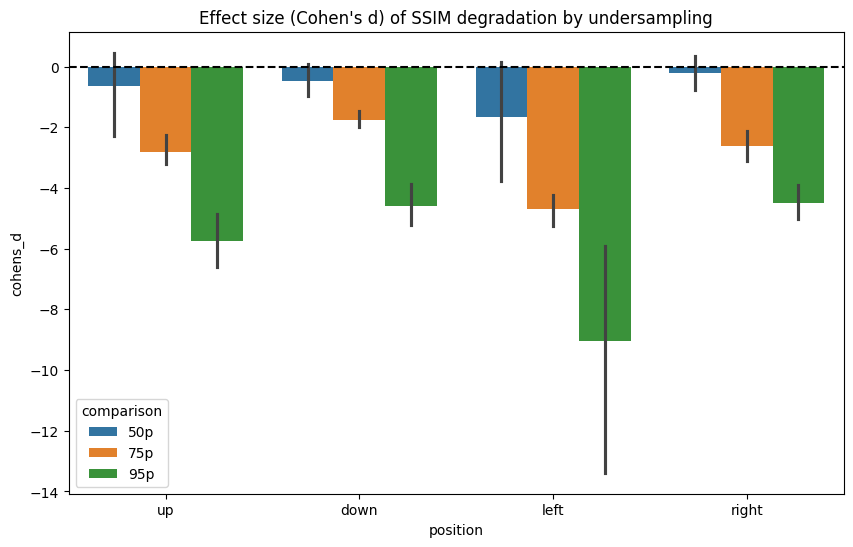

In [7]:
import pandas as pd
import numpy as np

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# Pivot the table so comparisons are columns
ssim_pivot = df_all.pivot_table(index=['subject', 'position', 'mask', 'region'],
                                   columns='comparison',
                                   values='ssim').reset_index()

# Compute differences with respect to 'woBin'
for comp in ['50p', '75p', '95p']:
    ssim_pivot[f'diff_{comp}'] = ssim_pivot[comp] - ssim_pivot['woBin']

ssim_pivot.head()

def cohen_d_paired(diff_array):
    return diff_array.mean() / diff_array.std(ddof=1)

# Example: compute Cohen's d for each position, mask, region, comparison
cohen_d_results = []

for pos in df_all['position'].unique():
    for mask in df_all['mask'].unique():
        for region in df_all['region'].unique():
            subset = ssim_pivot[(ssim_pivot['position']==pos) & 
                                (ssim_pivot['mask']==mask) & 
                                (ssim_pivot['region']==region)]
            if len(subset) == 0:
                continue
            for comp in ['50p', '75p', '95p']:
                d = cohen_d_paired(subset[f'diff_{comp}'].values)
                cohen_d_results.append({
                    'position': pos,
                    'mask': mask,
                    'region': region,
                    'comparison': comp,
                    'cohens_d': d
                })

cohen_d_df = pd.DataFrame(cohen_d_results)

# Average Cohen's d across positions for each mask, region, and comparison
cohen_summary = cohen_d_df.groupby(['mask', 'region', 'comparison'])['cohens_d'].mean().reset_index()

# Pivot the table so comparisons are columns
cohen_summary_pivot = cohen_summary.pivot_table(index=['mask', 'region'],
                                                columns='comparison',
                                                values='cohens_d').reset_index()

# Optional: rename columns for clarity
cohen_summary_pivot.columns.name = None
cohen_summary_pivot.rename(columns={'50p':'d_50p', '75p':'d_75p', '95p':'d_95p'}, inplace=True)
print(cohen_summary_pivot)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=cohen_d_df, x='position', y='cohens_d', hue='comparison')
plt.axhline(0, color='black', linestyle='--')
plt.title("Effect size (Cohen's d) of SSIM degradation by undersampling")
plt.show()


Mean+-std

In [12]:
# Load data
df_all = pd.read_csv("ssim_all_combined.csv")

# Compute mean and std across subjects and positions
summary = df_all.groupby(['mask', 'region', 'comparison'])['ssim'] \
                .agg(['mean', 'std']).reset_index()

# Compute percent change relative to woBin
# First, get mean woBin per mask/region
woBin_means = summary[summary['comparison'] == 'woBin'][['mask','region','mean']].rename(columns={'mean':'mean_woBin'})

# Merge to get woBin mean for each row
summary = summary.merge(woBin_means, on=['mask','region'])
summary['perc_change'] = (summary['mean'] - summary['mean_woBin']) / summary['mean_woBin'] * 100

# Create formatted column with mean ± std (percent_change)
summary['formatted'] = summary.apply(lambda row: f"{row['mean']:.4f} ± {row['std']:.4f} ({row['perc_change']:+.2f}%)", axis=1)

# Pivot table to have comparisons as columns
summary_table = summary.pivot(index=['mask','region'], columns='comparison', values='formatted').reset_index()

# Optional: reorder columns (ensure columns exist)
desired_cols = ['mask','region','50p','75p','95p','woBin']
available = [c for c in desired_cols if c in summary_table.columns]
summary_table = summary_table[available]

# Add Metric column and remove 'mask'
summary_table['metric'] = 'SSIM'
if 'mask' in summary_table.columns:
    summary_table = summary_table.drop(columns=['mask'])

# Reorder to place Metric first
cols_final = ['metric', 'region'] + [c for c in ['50p','75p','95p','woBin'] if c in summary_table.columns]
summary_table = summary_table[cols_final]

# Save table as csv
summary_table.to_csv("ssim_summary_table.csv", index=False)

summary_table

comparison,metric,region,50p,75p,95p,woBin
0,SSIM,Brain,0.9298 ± 0.0158 (-0.37%),0.8788 ± 0.0260 (-5.84%),0.7906 ± 0.0299 (-15.28%),0.9333 ± 0.0149 (+0.00%)
1,SSIM,CSF,0.9327 ± 0.0159 (-0.67%),0.8711 ± 0.0300 (-7.24%),0.7469 ± 0.0410 (-20.47%),0.9391 ± 0.0130 (+0.00%)
2,SSIM,GM,0.9245 ± 0.0180 (-0.46%),0.8668 ± 0.0325 (-6.68%),0.7578 ± 0.0422 (-18.41%),0.9288 ± 0.0170 (+0.00%)
3,SSIM,WM,0.9331 ± 0.0181 (-1.29%),0.8901 ± 0.0304 (-5.84%),0.8229 ± 0.0343 (-12.95%),0.9453 ± 0.0150 (+0.00%)
4,SSIM,Eyes,0.9026 ± 0.0299 (+1.68%),0.8421 ± 0.0375 (-5.14%),0.7265 ± 0.0350 (-18.16%),0.8877 ± 0.0376 (+0.00%)
5,SSIM,WholeVolume,0.9720 ± 0.0077 (+0.08%),0.9432 ± 0.0142 (-2.88%),0.8390 ± 0.0339 (-13.61%),0.9712 ± 0.0080 (+0.00%)


Boxplot

In [2]:
import pandas as pd
import plotly.express as px

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# --- Disentangle brain tissues ---
df_all['mask_region'] = df_all.apply(
    lambda row: f"{row['mask']}_{row['region']}" if row['mask'] == "brain" else row['mask'],
    axis=1
)

# === Boxplot 1: SSIM by comparison (per position and mask region) ===
# fig1 = px.box(
#     df_all,
#     x="comparison",
#     y="ssim",
#     color="mask_region",
#     facet_col="position",
#     points="all",
#     title="SSIM by Comparison and Position (per Mask / Brain Tissue)",
#     category_orders={
#         "comparison": ["woBin", "50p", "75p", "95p"],
#         "mask_region": ["volume", "brain_CSF", "brain_GM", "brain_WM", "eyes"]
#     }
# )
# fig1.update_layout(boxmode="group")
# fig1.show()

# === Boxplot 2: SSIM by mask region (per comparison and position) ===
fig2 = px.box(
    df_all,
    x="mask_region",
    y="ssim",
    color="comparison",
    facet_col="position",
    points="all",
    title="SSIM by Mask / Brain Tissue and Position (per Comparison)",
    category_orders={
        "mask_region": ["volume", "brain_CSF", "brain_GM", "brain_WM", "eyes"],
        "comparison": ["woBin", "50p", "75p", "95p"]
    }
)
fig2.update_layout(boxmode="group")
fig2.show()


Boxplot mean

In [10]:
import pandas as pd
import plotly.express as px

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# --- Disentangle brain tissues ---
df_all['mask_region'] = df_all.apply(
    lambda row: f"{row['mask']}_{row['region']}" if row['mask'] == "brain" else row['mask'],
    axis=1
)

# === Compute mean SSIM per subject across positions ===
df_mean = df_all.groupby(
    ["subject", "mask_region", "comparison"], as_index=False
)["ssim"].mean()

# --- Map to simplified mask region names for ordering ---
map_simple = {
    "volume": "volume",
    "brain_Brain": "brain",
    "brain_CSF": "csf",
    "brain_GM": "gm",
    "brain_WM": "wm",
    "eyes": "eyes"
}
df_mean['mask_region_simple'] = df_mean['mask_region'].map(map_simple).fillna(df_mean['mask_region'])

# Ensure categorical ordering: volume, brain, csf, gm, wm, eyes
category_order = ["volume", "brain", "csf", "gm", "wm", "eyes"]
df_mean['mask_region_simple'] = pd.Categorical(df_mean['mask_region_simple'],
                                              categories=category_order,
                                              ordered=True)

# === Boxplot of averaged SSIM per subject ===
fig_avg = px.box(
    df_mean,
    x="mask_region_simple",
    y="ssim",
    color="comparison",
    points="all",
    title="Mean SSIM per Subject across Positions",
    category_orders={
        "mask_region_simple": category_order,
        "comparison": ["woBin", "50p", "75p", "95p"]
    },
    labels={"mask_region_simple": "Mask / Brain Region"}
)
fig_avg.update_layout(boxmode="group")
fig_avg.show()


Line plot mean

In [6]:
import pandas as pd
import plotly.graph_objects as go

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# (Optional) average per subject, mask/region, reconstruction if multiple positions exist
df_ssim_mean = df_all.groupby(
    ['subject', 'mask', 'region', 'comparison'], as_index=False
)['ssim'].mean()

# === Replace region name ===
df_ssim_mean['region'] = df_ssim_mean['region'].replace({'WholeVolume': 'Volume'})

# === Define orderings ===
comparison_order = ["woBin", "50p", "75p", "95p"]  # no "full"
region_order = ["Volume", "Brain", "CSF", "GM", "WM", "Eyes"]

df_ssim_mean['comparison'] = pd.Categorical(
    df_ssim_mean['comparison'], categories=comparison_order, ordered=True
)
df_ssim_mean['region'] = pd.Categorical(
    df_ssim_mean['region'], categories=region_order, ordered=True
)
df_ssim_mean.sort_values(['region', 'comparison'], inplace=True)

# === Define subjects and colors ===
subjects = df_ssim_mean['subject'].unique()
color_map = {subj: color for subj, color in zip(subjects, ['red', 'blue', 'green', 'orange', 'purple'])}

# === Create combined x-axis labels ===
df_ssim_mean['x_label'] = df_ssim_mean.apply(lambda r: f"{r['comparison']}-{r['region']}", axis=1)

# === Plot ===
fig = go.Figure()

for subj in subjects:
    subj_df = df_ssim_mean[df_ssim_mean['subject'] == subj]
    fig.add_trace(
        go.Scatter(
            x=subj_df['x_label'],
            y=subj_df['ssim'],
            mode='lines+markers',
            name=f"Subject {subj}",
            line=dict(color=color_map[subj]),
            marker=dict(color=color_map[subj])
        )
    )

fig.update_layout(
    title="Mean SSIM per Subject across Reconstructions and Regions",
    xaxis_title="Reconstruction–Region",
    yaxis_title="SSIM",
    height=600,
    width=1200,
    template="plotly_white"
)

fig.show()


Bar chart

In [1]:
import pandas as pd
import plotly.express as px

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# --- Disentangle brain tissues ---
df_all['mask_region'] = df_all.apply(
    lambda row: f"{row['mask']}_{row['region']}" if row['mask'] == "brain" else row['mask'],
    axis=1
)

# === Aggregate mean and std for SSIM ===
df_mean = (
    df_all
    .groupby(["mask_region", "position", "comparison"], as_index=False)
    .agg(mean_ssim=("ssim", "mean"), std_ssim=("ssim", "std"))
)

# === Figure 1: comparison on x-axis, grouped by mask_region, faceted by position ===
# fig1 = px.bar(
#     df_mean,
#     x="comparison",           # comparisons on x-axis
#     y="mean_ssim",
#     color="mask_region",       # mask regions as color
#     facet_col="position",      # positions as facets
#     error_y="std_ssim",
#     barmode="group",
#     title="Mean SSIM ± SD across subjects (x=comparison, brain tissues separated)",
#     color_discrete_sequence=px.colors.qualitative.Set2,
#     category_orders={
#         "comparison": ["woBin", "50p", "75p", "95p"],
#         "mask_region": ["volume", "brain_CSF", "brain_GM", "brain_WM", "eyes"]
#     }
# )
# fig1.update_layout(template="plotly_white", yaxis_title="Mean SSIM", xaxis_title="Comparison", title_x=0.5)
# fig1.show()

# === Figure 2: mask_region on x-axis, grouped by comparison, faceted by position ===
fig2 = px.bar(
    df_mean,
    x="mask_region",          # mask regions on x-axis
    y="mean_ssim",
    color="comparison",       # comparisons as color/legend
    facet_col="position",     # positions as facets
    error_y="std_ssim",
    barmode="group",
    title="Mean SSIM ± SD across subjects (x=mask region, tissues separated)",
    color_discrete_sequence=px.colors.qualitative.Set2,
    category_orders={
        "mask_region": ["volume", "brain_CSF", "brain_GM", "brain_WM", "eyes"],
        "comparison": ["woBin", "50p", "75p", "95p"]
    }
)
fig2.update_layout(template="plotly_white", yaxis_title="Mean SSIM", xaxis_title="Mask / Brain Tissue", title_x=0.5)
fig2.show()


Scatter plot

In [12]:
import pandas as pd
import plotly.express as px

# === Load combined SSIM data ===
df_all = pd.read_csv("ssim_all_combined.csv")

# --- Disentangle brain tissues ---
df_all['mask_region'] = df_all.apply(
    lambda row: f"{row['mask']}_{row['region']}" if row['mask'] == "brain" else row['mask'],
    axis=1
)

# === Scatter plot per subject, with brain tissues separated ===
fig = px.scatter(
    df_all,
    x="mask_region",
    y="ssim",
    color="comparison",      # use the disentangled brain tissues
    symbol="subject",
    facet_col="position",
    category_orders={
        "comparison": ["woBin", "50p", "75p", "95p"],
        "mask_region": ["volume", "brain_CSF", "brain_GM", "brain_WM", "eyes"]
    },
    title="SSIM per subject and reconstruction type (brain tissues separated)"
)
fig.update_traces(marker_size=10)
fig.update_layout(template="plotly_white")
fig.show()
